In [1]:
%matplotlib widget
from nav_projection import *
from utils import *

ns = NAVScenarioLinear(load_from_file="nav_linear_state.pkl")

In [2]:
import matplotlib.pyplot as plt
indices, contracts, _, compose_times, tactics = zip(*ns.contracts)

# Generate the x values (the indices of the tuples)
indices = range(len(ns.contracts))

variable_counts = [len(c.vars) for c in contracts]
constraint_counts = [len(c.a.terms) + len(c.g.terms) for c in contracts]


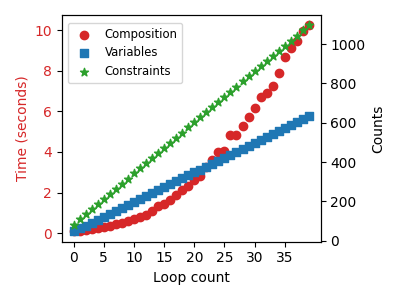

In [3]:
# Create a new figure and a subplot
fig, ax1 = plt.subplots()

ax1.set_title('')
# Setting x-ticks to multiples of 5
ax1.set_xticks(range(0, len(compose_times), 5))

# Plotting the times_in_seconds on the left y-axis
ax1.set_xlabel('Loop count')
ax1.set_ylabel('Time (seconds)', color='tab:red')
ax1.scatter(range(len(compose_times)), compose_times, color='tab:red', label='Composition', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for variable_counts and constraint_counts
ax2 = ax1.twinx()

# We already handled the x-label with ax1
ax2.set_ylabel('Counts', color='black')
ax2.scatter(range(len(variable_counts)), variable_counts, color='tab:blue', label='Variables', marker='s')
ax2.scatter(range(len(constraint_counts)), constraint_counts, color='tab:green', label='Constraints', marker='*')

ax2.tick_params(axis='y', labelcolor='black')

# Get the legend handles and labels for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Create a single legend with all handles and labels
ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0.0, 0.99), fontsize='small')

fig.set_size_inches(4,3)
fig.tight_layout()  # To ensure that the right y-label is not clipped
fig.savefig('nav-linear-construction.pgf', format='pgf', bbox_inches='tight',pad_inches=0)
plt.show()
